# Use Cases for Dynamic Tests
This notebook examine several models in biomodels to study use cases for tests. The notebook makes use of the pySBFitter repository, and so it will need to be cloned and the path to it will have to be updated for this notebook to run.

In [1]:
import sys
# Update this path
sys.path.insert(0, '/home/ubuntu/pySBFitter')

In [2]:
import tellurium as te
import matplotlib.pyplot as plt
from pySBFitter.namedTimeseries import NamedTimeseries, TIME
from pySBFitter.timeseriesPlotter import TimeseriesPlotter

## Functions

In [3]:
def mk_local_path(model_num, is_xml=True, version:str=None):
    """
    A version is defined by the absense of a named reaction
    """
    num_str = "%03d" % model_num
    if version is not None:
        is_xml = False
    if version is None:
        version = ""
    else:
        version = "-%d" % version
    if is_xml:
        suffix = "_url.xml"
    else:
        suffix = ".ant"
    return "BIOMD0000000%s%s%s" % (num_str, version, suffix)

In [4]:
def mk_biomodels_path(model_num):
    num_str = "%03d" % model_num
    return "https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000%s?filename=BIOMD0000000%s_url.xml" % (num_str, num_str)

In [5]:
# Extracting a model from Antimony
def mk_antimony_file(model_num):
    sbml_path = mk_biomodels_path(model_num)
    local_path = mk_local_path(model_num, is_xml=False)
    print ("** Creating file %s" % local_path)
    rr = te.loadSBMLModel(sbml_path)
    model = (rr.getAntimony())
    with open(local_path, "w") as fd:
        fd.writelines(model)

In [6]:
def simulate(model_num, version=None, sim_time=100, is_xml=True, is_plot=True):
    if version is not None:
        is_xml = False
    if is_xml:
        path = mk_biomodels_path(model_num)
        rr = te.loadSBMLModel(path)
    else:
        path = mk_local_path(model_num, is_xml=is_xml , version=version)
        with open(path, "r") as fd:
            model_str = fd.read()
        rr = te.loada(model_str)
    data = rr.simulate(start=0, end=sim_time, points=sim_time)
    data_ts = NamedTimeseries(namedArray=data)
    if is_plot:
        plotter = TimeseriesPlotter()
        plotter.plotTimeSingle(data_ts, numCol=8, figsize=(16, 10), titlePosition=(0.6, 1), title="")
    return data_ts

In [7]:
def evalVersion(model_num, version, legend=None, **kwargs):
    kwargs['is_plot'] = False
    data_ts = simulate(model_num, version=None, **kwargs)
    data_p_ts = simulate(model_num, version=version, **kwargs)
    plotter = TimeseriesPlotter()
    plotter.plotTimeSingle(data_ts, timeseries2=data_p_ts, numCol=8, color=["b", "r"], figsize=(16, 10),
                          legend=legend)

## Plots of Models
This is a section in which I explored several models to see which have interesting trajectories.

*** Model 503***
** Creating file BIOMD0000000503.ant


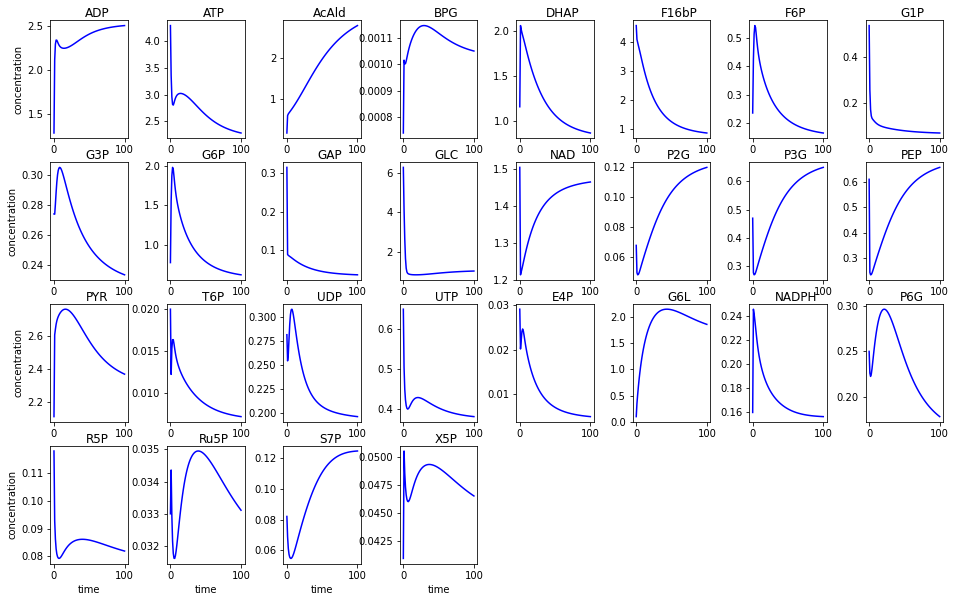

*** Model 510***
** Creating file BIOMD0000000510.ant


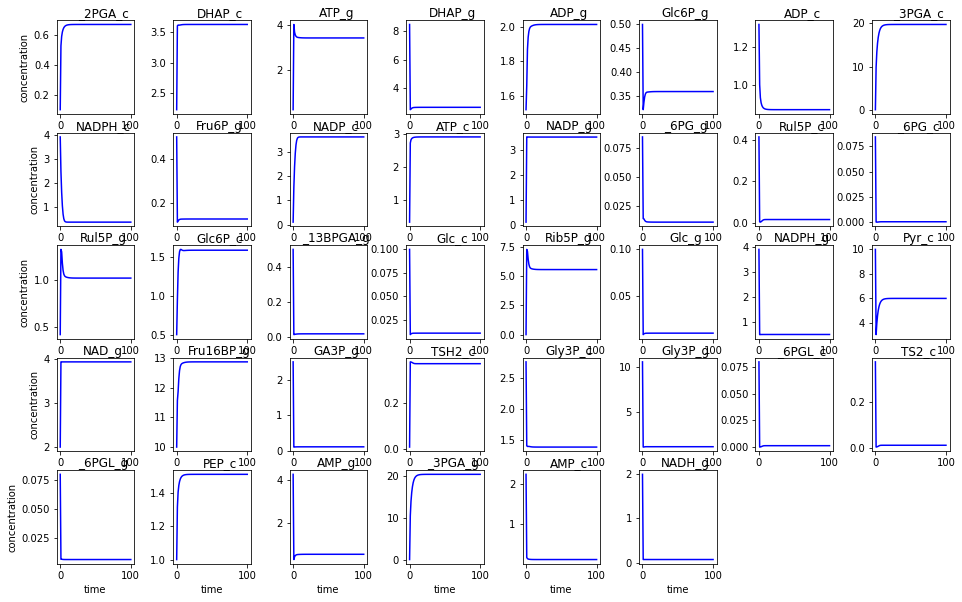

*** Model 511***
** Creating file BIOMD0000000511.ant


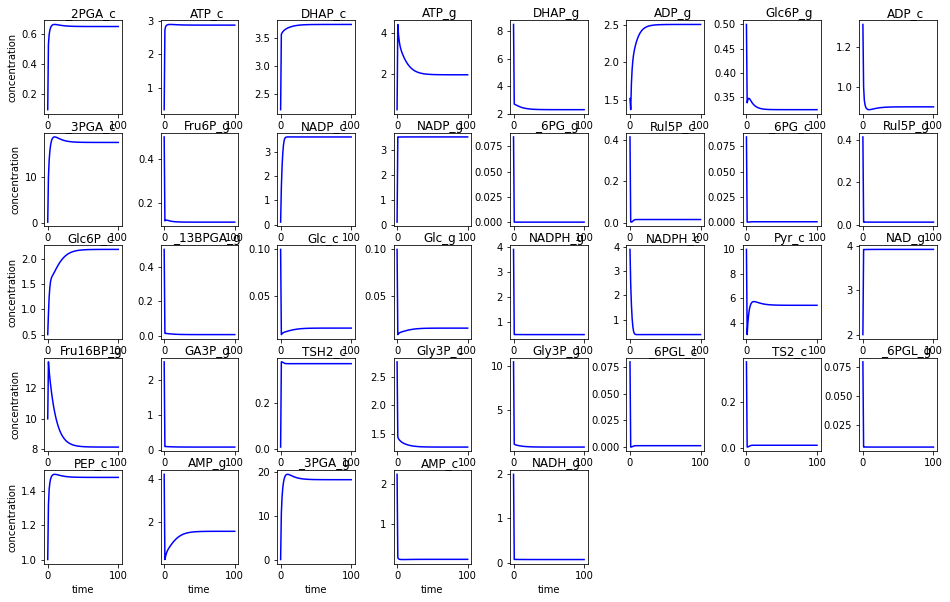

*** Model 513***
** Creating file BIOMD0000000513.ant


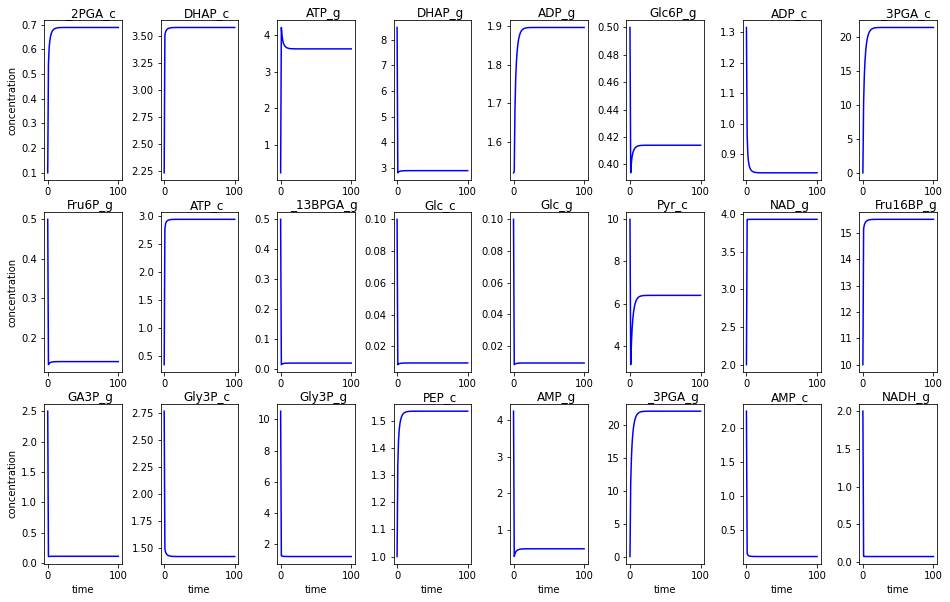

*** Model 514***
** Creating file BIOMD0000000514.ant


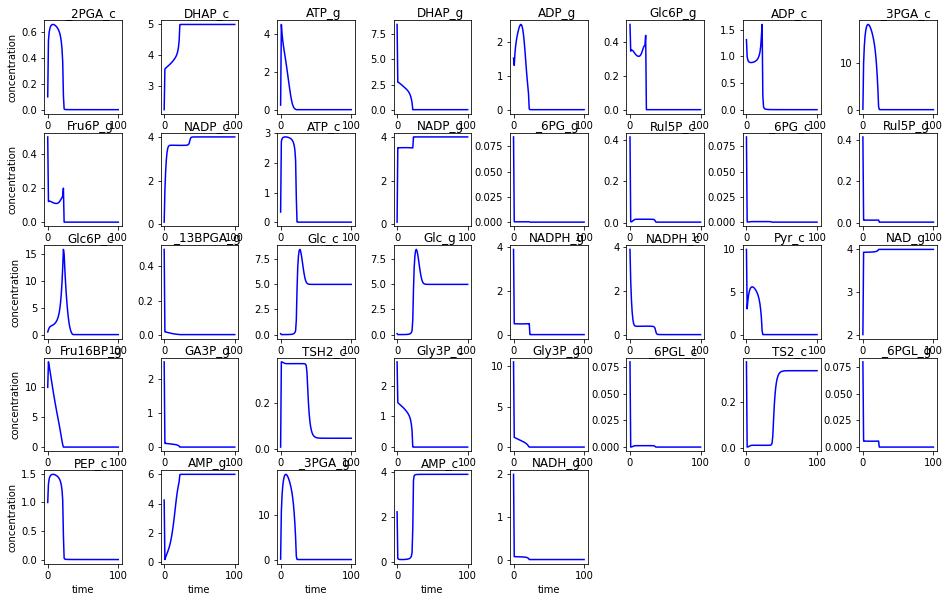

*** Model 515***
** Creating file BIOMD0000000515.ant


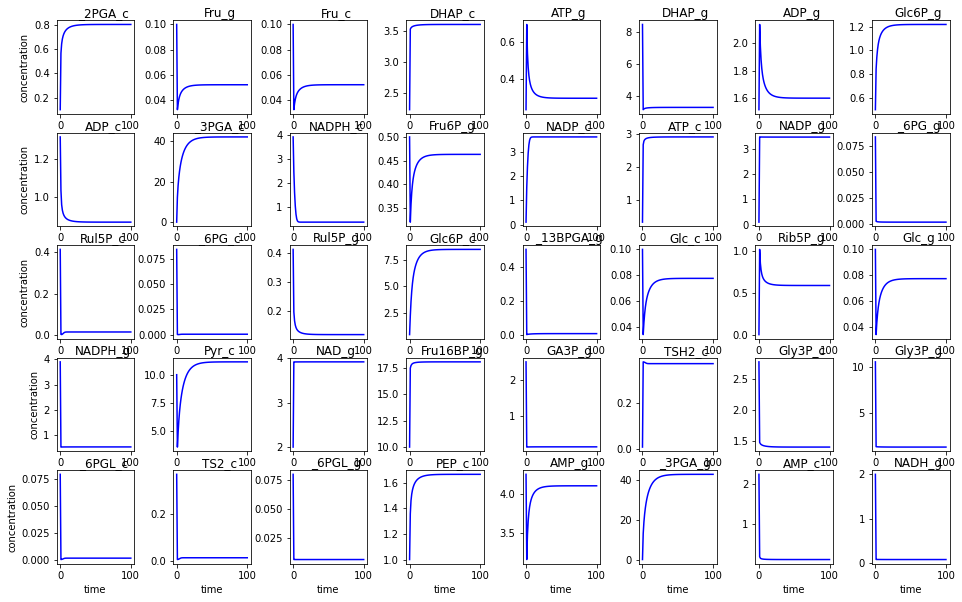

*** Model 516***
** Creating file BIOMD0000000516.ant


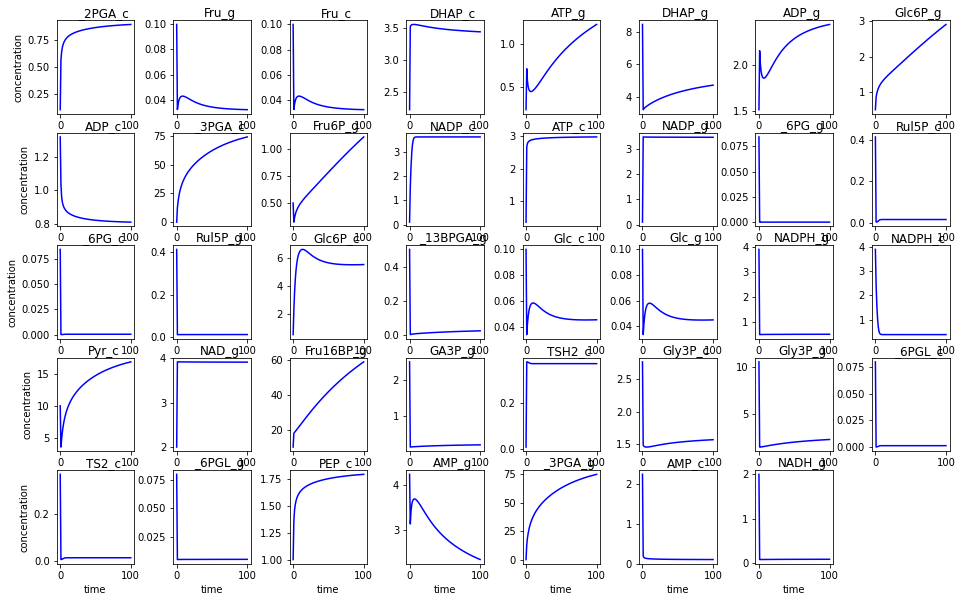

In [8]:
model_nums = [503, 510, 511, 513, 514, 515, 516]
for model_num in model_nums:
    print("*** Model %d***" % model_num)
    mk_antimony_file(model_num)
    simulate(model_num)

## Analysis of BioModels 122

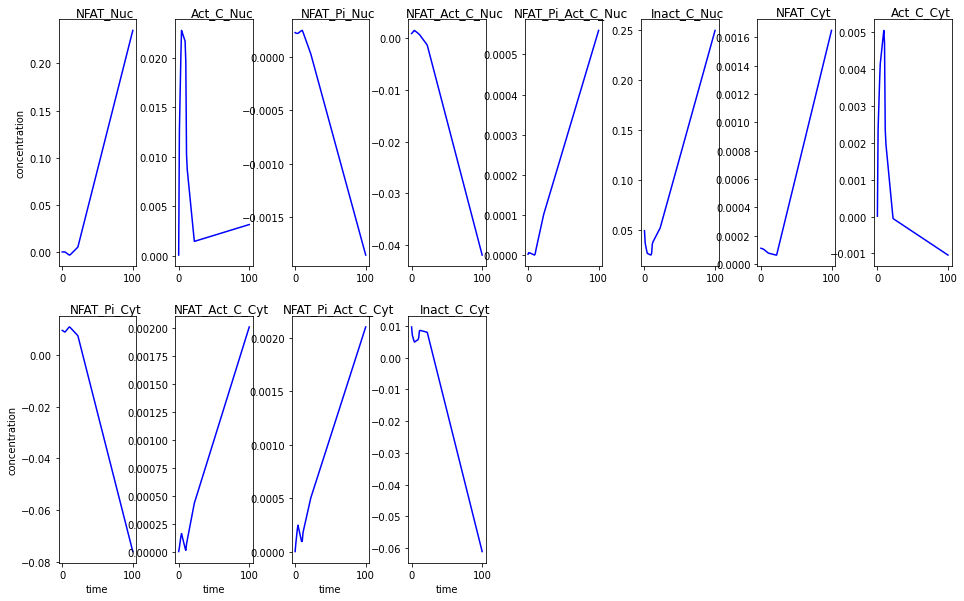

** Creating file BIOMD0000000122.ant


In [10]:
model_num = 122
data_ts = simulate(model_num)
mk_antimony_file(model_num)

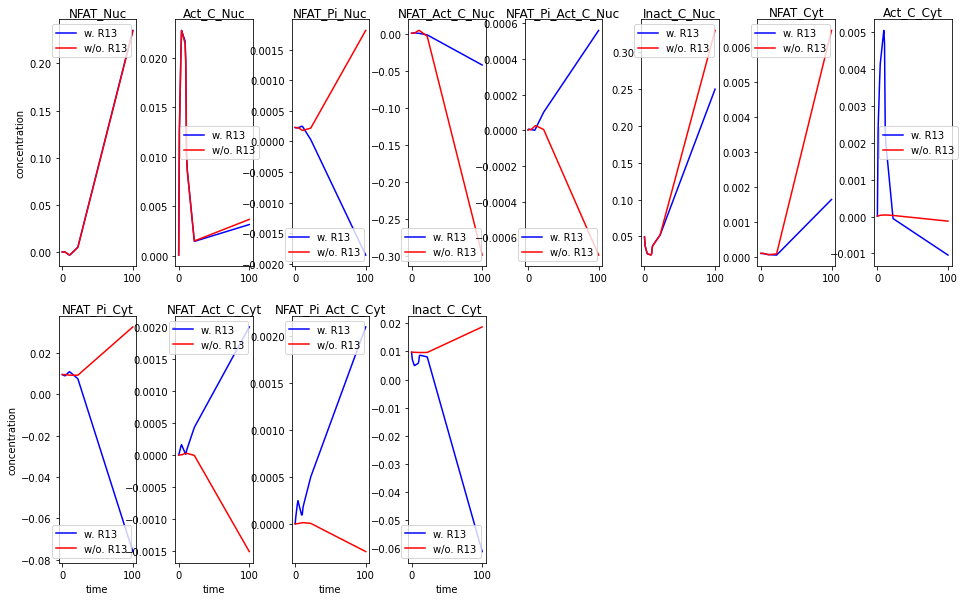

In [11]:
# This version of the model excludes the following reaction:
#  R13: 3 $Ca_Cyt + Inact_C_Cyt -> Act_C_Cyt; cytosol*(k19*Inact_C_Cyt*Ca_Cyt^3 - k20*Act_C_Cyt)
# Without this reaction, there is no creation of activated CN in the cytosol.

evalVersion(122, 1, legend=["w. R13", "w/o. R13"])

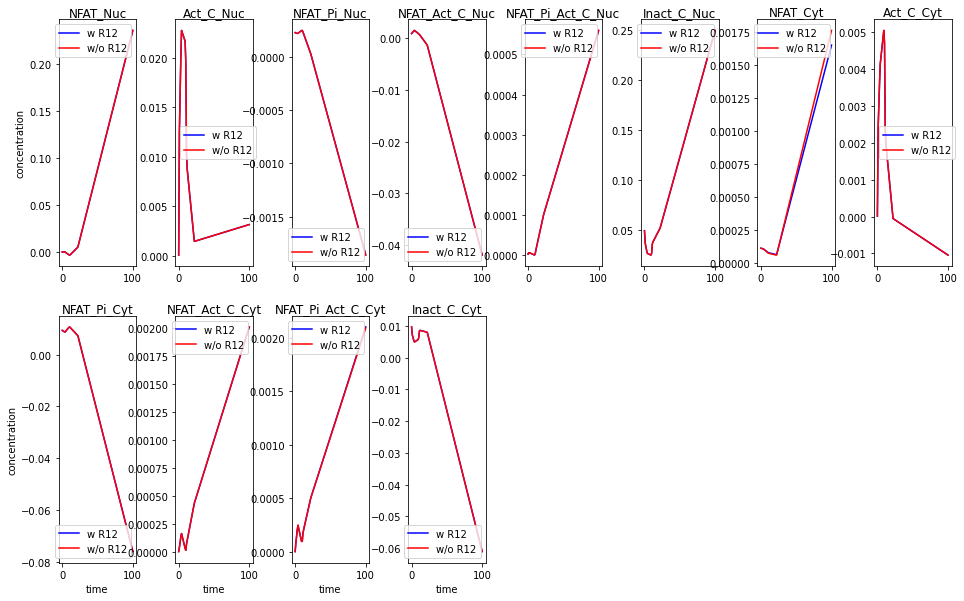

In [12]:
# This version of the model excludes the following reaction:
#  R12
evalVersion(122,2, legend=["w R12", "w/o R12"])

**Observations**
1. Focus on change in behaviour of Inact_C_Cyt since this changes its monotonicity.
1. Justify same behavior for a couple of curves